<a href="https://colab.research.google.com/github/cotpetru24/data_mining/blob/main/stu124543_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [413]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

Import dataset => pd.read_excel() & pd.read_csv()

In [326]:
# 1 - Import the dataset
df_temp = pd.read_excel("/content/Lobster_Data_Set.xlsx")
# 2 - Convert the dataset to .csv
df_temp.to_csv("/content/lobster_data_set.csv", index = False)
# 3 - Import the dataset in .csv format
df = pd.read_csv("lobster_data_set.csv")

Print the shape and info of the dataframe => df.shape() & df.info()

In [327]:
print(f"Dataset shape = {df.shape}\n")
print("Dataset info\n")
print(df.info())

Dataset shape = (2097, 8)

Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2097 non-null   object 
 1   Length(mm)        2095 non-null   float64
 2   Diameter(mm)      2096 non-null   float64
 3   Height(mm)        2096 non-null   float64
 4   WholeWeight(g)    2096 non-null   float64
 5   ShuckedWeight(g)  2095 non-null   float64
 6   SellWeight(g)     2096 non-null   float64
 7   Spots             2097 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 131.2+ KB
None


Preview the dataset - df.head()

In [328]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("Dataset preview:\n")
print(df.head(10))

Dataset preview:

  Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)  Spots
0   M       0.455         0.365       0.095          0.5140            0.2245          0.150     15
1   M       0.350         0.265       0.090          0.2255            0.0995          0.070      7
2   F       0.530         0.420       0.135          0.6770            0.2565          0.210      9
3   M       0.440         0.365       0.125          0.5160            0.2155          0.155     10
4   I       0.330         0.255       0.080          0.2050            0.0895          0.055      7
5   I       0.425         0.300       0.095          0.3515            0.1410          0.120      8
6   F       0.530         0.415       0.150          0.7775            0.2370          0.330     20
7   F       0.545         0.425       0.125          0.7680            0.2940          0.260     16
8   M       0.475         0.370       0.125          0.5095            0.2165     

Display only categorical data

In [329]:
df_categorical = df.select_dtypes(exclude=np.number)
print(df_categorical)

     Sex
0      M
1      M
2      F
3      M
4      I
...   ..
2092   M
2093   F
2094   I
2095   M
2096   M

[2097 rows x 1 columns]


Identify the unique values of the 'Sex' column

In [330]:
print(df_categorical.Sex.value_counts())

M    771
I    683
F    641
0      2
Name: Sex, dtype: int64


Drop the rows where "Sex" == '0'

In [331]:
condition = df[(df['Sex'] == '0')].index
clean_df = df.drop(condition)

Confirm dataframe doesn't contain rows where 'Sex' == '0'

In [332]:
clean_df_categorical = clean_df.select_dtypes(exclude=np.number)
print(clean_df_categorical.Sex.value_counts())

M    771
I    683
F    641
Name: Sex, dtype: int64


Replace categorical data with numerical and store the unique values of the numerical data in a dictionary

In [333]:
sex_categorical = { 1: 'M', 2: 'F', 3: 'I'}
clean_df['Sex'].replace({'M': 1, 'F': 2, 'I': 3}, inplace=True)


Confirm categorical values have been replaced and dataframe has been updated

In [334]:
print(clean_df.info())
print(clean_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2095 non-null   int64  
 1   Length(mm)        2093 non-null   float64
 2   Diameter(mm)      2094 non-null   float64
 3   Height(mm)        2094 non-null   float64
 4   WholeWeight(g)    2094 non-null   float64
 5   ShuckedWeight(g)  2093 non-null   float64
 6   SellWeight(g)     2094 non-null   float64
 7   Spots             2095 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 147.3 KB
None
      Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)  Spots
0       1       0.455         0.365       0.095          0.5140            0.2245          0.150     15
1       1       0.350         0.265       0.090          0.2255            0.0995          0.070      7
2       2       0.530         0.420       0.135        

Drop irrelevant columns

In [335]:
clean_df.drop(['Spots', 'Height(mm)', 'SellWeight(g)', 'Diameter(mm)'], axis=1, inplace=True)


Checking the dataset for missing values and printing the total number of cells where value is missing

In [336]:
print("Number of cells where value is missing - each column:")
print(clean_df.isnull().sum())
print(f"\nTotal number of cells where value is missing : {clean_df.isnull().sum().sum()}")

Number of cells where value is missing - each column:
Sex                 0
Length(mm)          2
WholeWeight(g)      1
ShuckedWeight(g)    2
dtype: int64

Total number of cells where value is missing : 5


Conditionally fill missing values with the median value of each column based on Sex
Confirm there are no more missing values

In [337]:
clean_df.loc[clean_df['Sex'] == 1] = (
    clean_df.loc[clean_df['Sex'] == 1].fillna(value=clean_df.loc[clean_df['Sex'] == 1].median(axis=0)))
clean_df.loc[clean_df['Sex'] == 2] = (
    clean_df.loc[clean_df['Sex'] == 2].fillna(value=clean_df.loc[clean_df['Sex'] == 2].median(axis=0)))
clean_df.loc[clean_df['Sex'] == 3] = (
    clean_df.loc[clean_df['Sex'] == 3].fillna(value=clean_df.loc[clean_df['Sex'] == 3].median(axis=0)))

print("\nNumber of cells where value is missing after .fillna() - each column:")
print(clean_df.isnull().sum())
print(f"\nTotal number of cells where value is missing after .fillna() : {clean_df.isnull().sum().sum()}")


Number of cells where value is missing after .fillna() - each column:
Sex                 0
Length(mm)          0
WholeWeight(g)      0
ShuckedWeight(g)    0
dtype: int64

Total number of cells where value is missing after .fillna() : 0


View descriptive statistics - df.describe()

In [338]:
print(clean_df.describe())

               Sex   Length(mm)  WholeWeight(g)  ShuckedWeight(g)
count  2095.000000  2095.000000     2095.000000       2095.000000
mean      1.957995     0.521050        0.818757          0.355364
std       0.832226     0.122029        0.495660          0.225069
min       1.000000     0.000000        0.000000          0.000000
25%       1.000000     0.450000        0.430750          0.180000
50%       2.000000     0.540000        0.793000          0.332500
75%       3.000000     0.610000        1.133250          0.495500
max       3.000000     0.815000        2.825500          1.488000


Check for outliers using boxplot

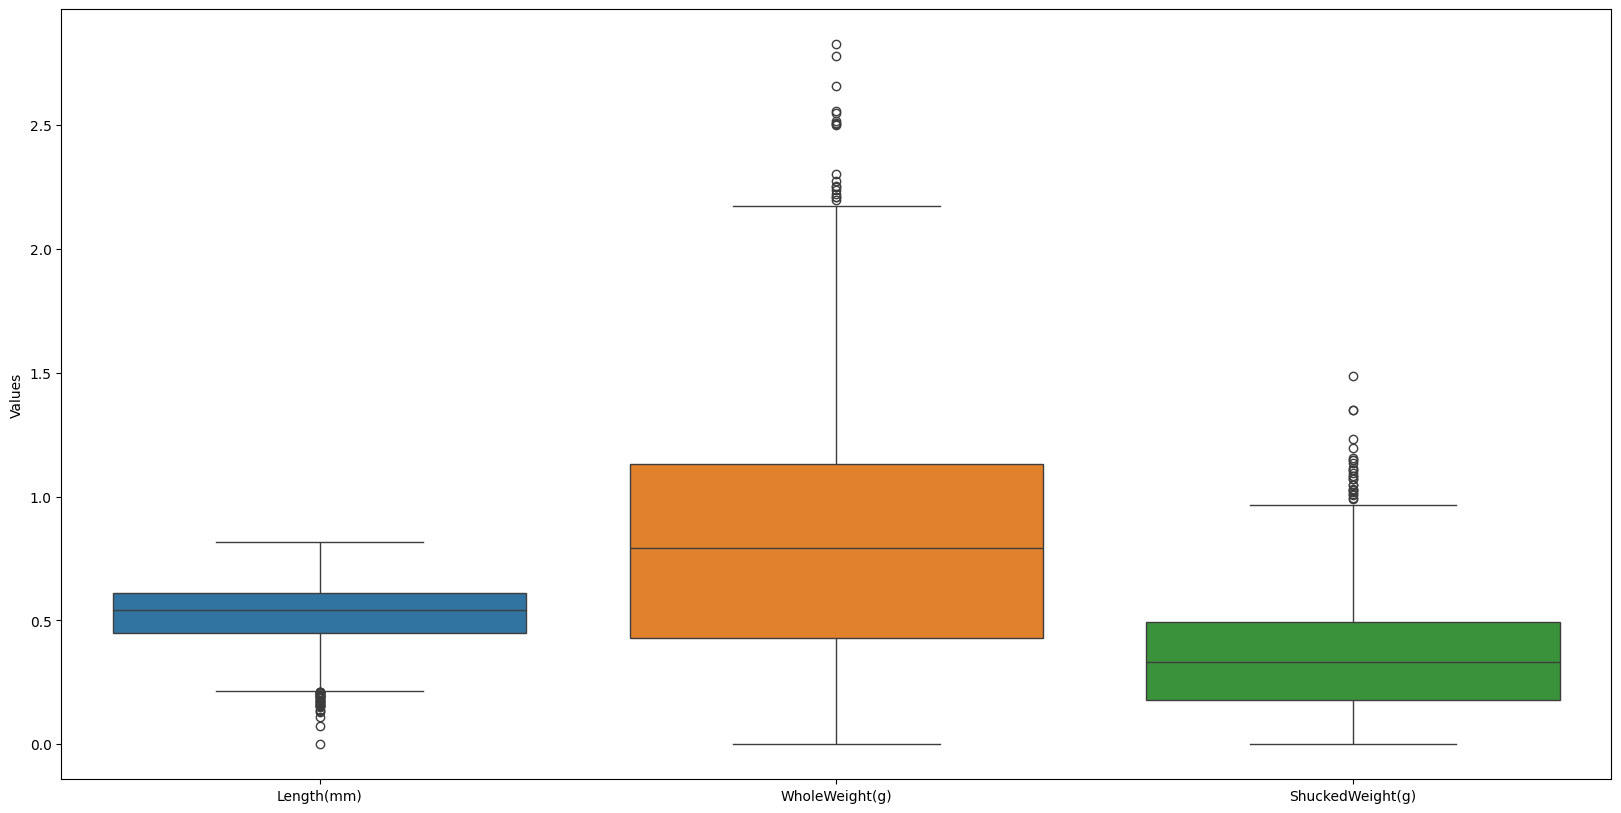

In [339]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=clean_df.iloc[:,1:], orient='v')
plt.ylabel('Values')
plt.show()

Remove outliers using the Interquartile range (IQR) method

In [340]:
for col in clean_df.columns:
    Q1 = np.percentile(clean_df[col], 25, interpolation='midpoint')
    Q2 = np.percentile(clean_df[col], 50, interpolation='midpoint')
    Q3 = np.percentile(clean_df[col], 75, interpolation='midpoint')
    print(f"{col} percentiles are=> 0.25: {Q1}, 0.50: {Q2}, 0.75: {Q3}")
    IQR = Q3 - Q1
    print(f"{col} IQR is {IQR}\n")
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clean_df = clean_df[(clean_df[col] > lower_bound) & (clean_df[col] < upper_bound)]

    #clean_df = clean_df[((clean_df[col] > lower_bound) & (clean_df[col] > 0)) & (clean_df[col] < upper_bound)]

Sex percentiles are=> 0.25: 1.0, 0.50: 2.0, 0.75: 3.0
Sex IQR is 2.0

Length(mm) percentiles are=> 0.25: 0.45, 0.50: 0.54, 0.75: 0.61
Length(mm) IQR is 0.15999999999999998

WholeWeight(g) percentiles are=> 0.25: 0.447, 0.50: 0.8015, 0.75: 1.1367500000000001
WholeWeight(g) IQR is 0.6897500000000001

ShuckedWeight(g) percentiles are=> 0.25: 0.1865, 0.50: 0.335, 0.75: 0.49375
ShuckedWeight(g) IQR is 0.30725



Confirm outliers have been removed

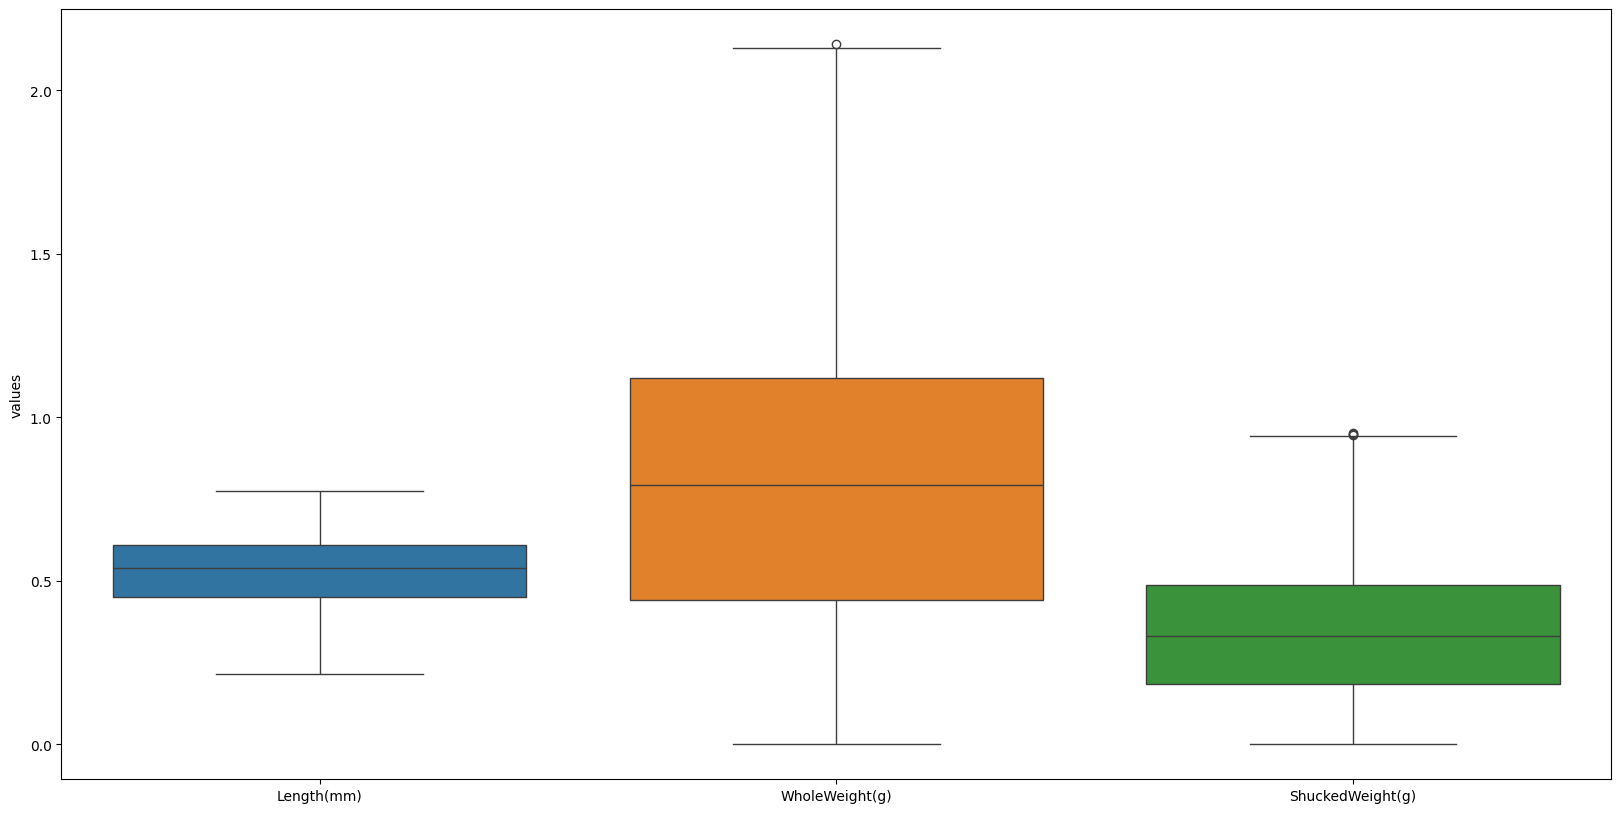

In [342]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=clean_df.iloc[:,1:], orient='v')
plt.ylabel('values')
plt.show()

View descriptive statistics after outliers have been removed

In [343]:
print(clean_df.describe())

               Sex   Length(mm)  WholeWeight(g)  ShuckedWeight(g)
count  2025.000000  2025.000000     2025.000000       2025.000000
mean      1.955556     0.523743        0.807875          0.348954
std       0.829901     0.111410        0.455977          0.203185
min       1.000000     0.215000        0.000000          0.000000
25%       1.000000     0.450000        0.441000          0.185000
50%       2.000000     0.540000        0.793000          0.332500
75%       3.000000     0.610000        1.120000          0.488000
max       3.000000     0.775000        2.141000          0.952000


Distribution of each variable

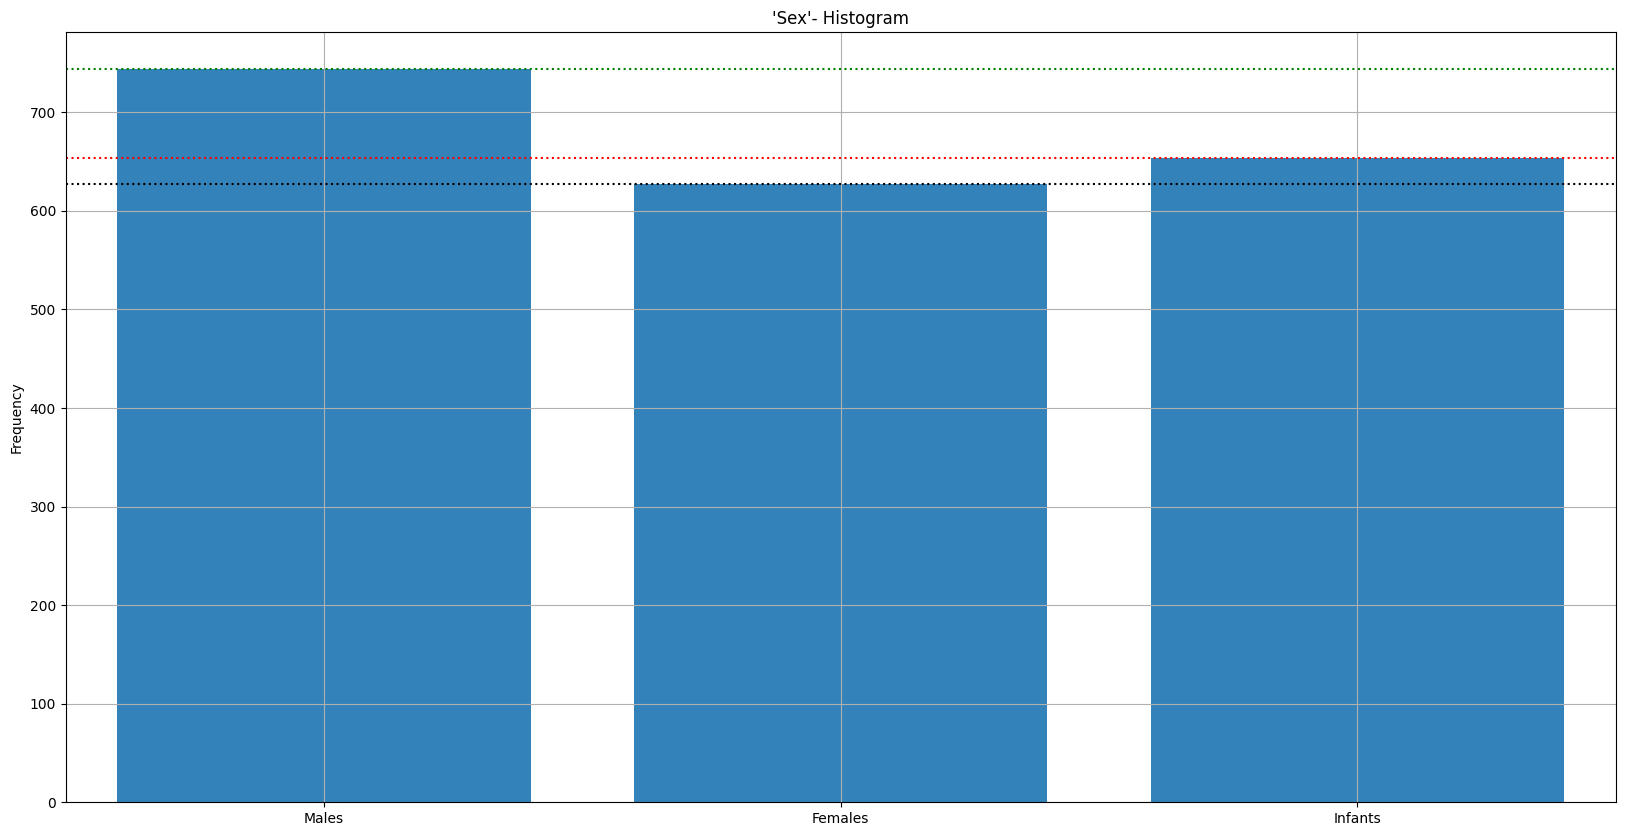

In [344]:
counts = clean_df['Sex'].value_counts().sort_index()
line_colors = ['green', 'black', 'red']
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, tick_label=['Males', 'Females', 'Infants'], alpha=0.7)
plt.xlim(0.5, 3.5)
xlims = plt.xlim()
# Adding horizontal lines across the plot for each bar, with different colors
for bar, color in zip(bars, line_colors):
    plt.hlines(bar.get_height(), xlims[0], xlims[1], color=color, linestyles='dotted')

plt.hist(data=clean_df, x='Sex', rwidth=0.8, bins=[0.5, 1.5, 2.5, 3.5], alpha=0.7)
plt.title("'Sex'- Histogram")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

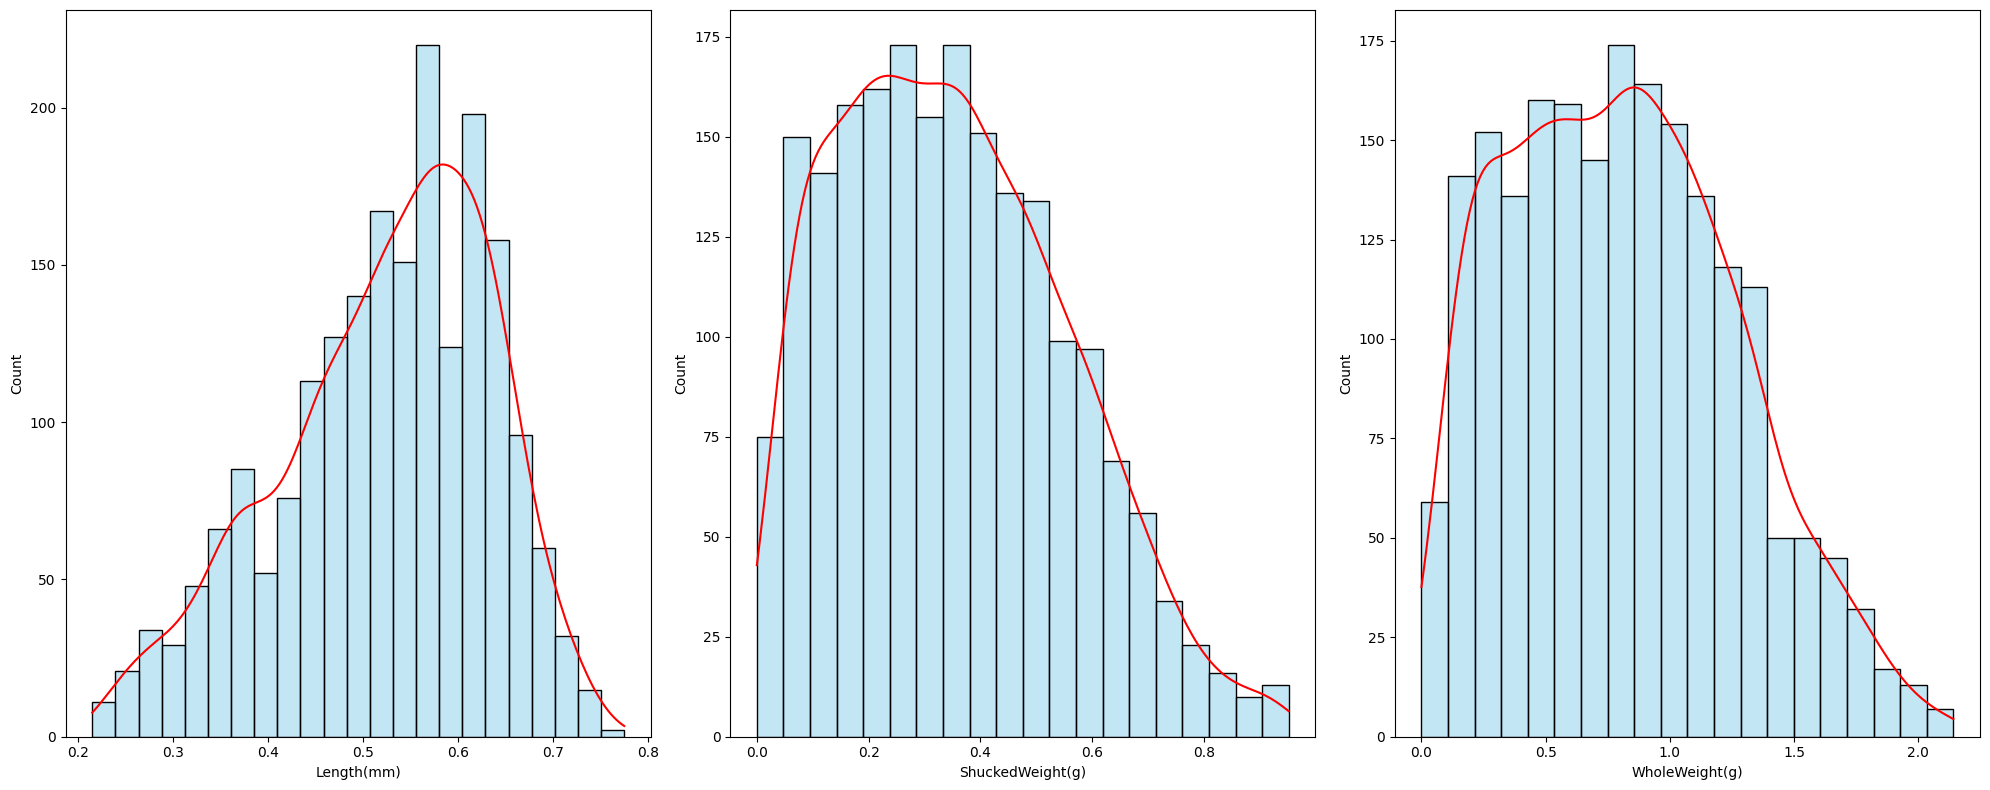

In [348]:
plt.figure(figsize=(20, 8))
plotnumber=1
for col in ['Length(mm)', 'ShuckedWeight(g)', 'WholeWeight(g)']:
    if plotnumber <= 3:
        plt.subplot(1,3, plotnumber)
        plot = sns.histplot(clean_df[col], kde=True, color='skyblue')
        plot.lines[0].set_color('red')
    plotnumber+=1
plt.tight_layout()
plt.show()

Pie chart for "Sex" column

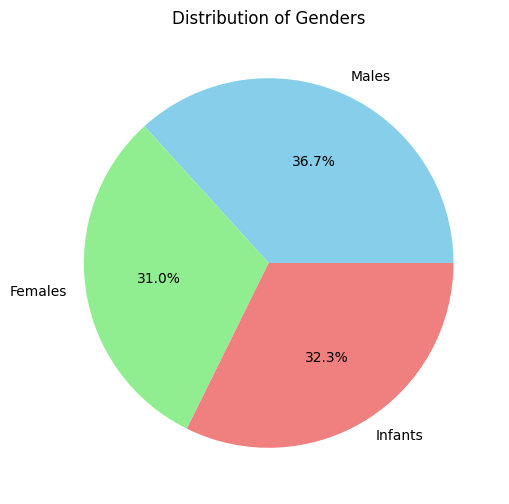

In [349]:
labels = ['Males', 'Females', 'Infants']
colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Genders')
plt.show()

Scatter plots

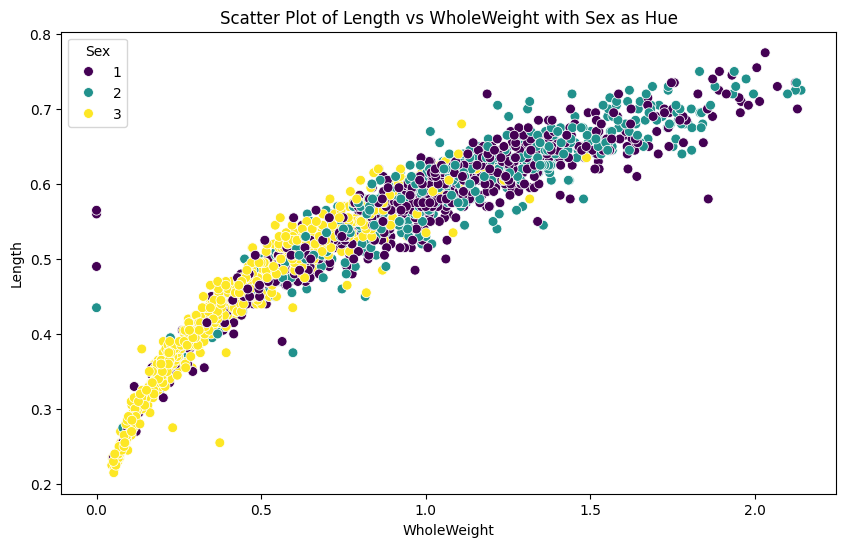

In [357]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='WholeWeight(g)', y='Length(mm)', hue='Sex', palette='viridis', s=50)
plt.xlabel('WholeWeight')
plt.ylabel('Length')
plt.title('Scatter Plot of Length vs WholeWeight with Sex as Hue')
plt.legend(title='Sex')
plt.show()

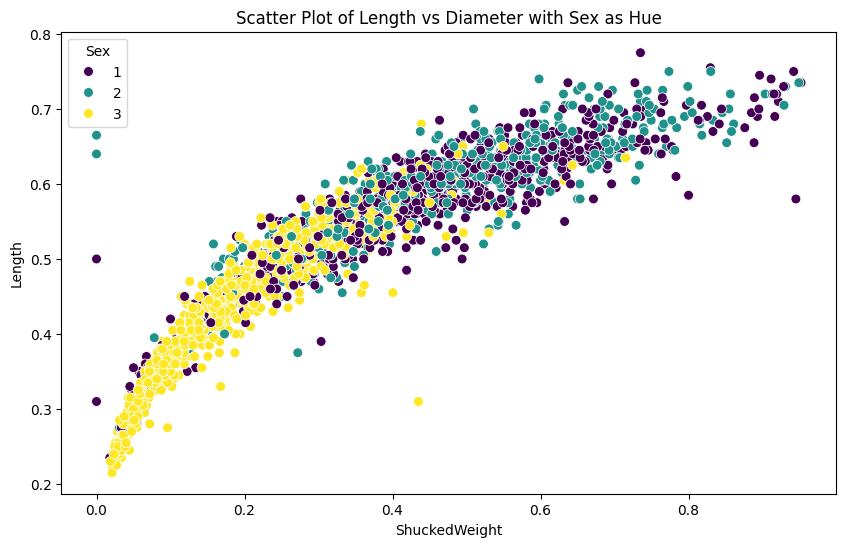

In [358]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='ShuckedWeight(g)', y='Length(mm)', hue='Sex', palette='viridis', s=50)
plt.xlabel('ShuckedWeight')
plt.ylabel('Length')
plt.title('Scatter Plot of Length vs Diameter with Sex as Hue')
plt.legend(title='Sex')
plt.show()

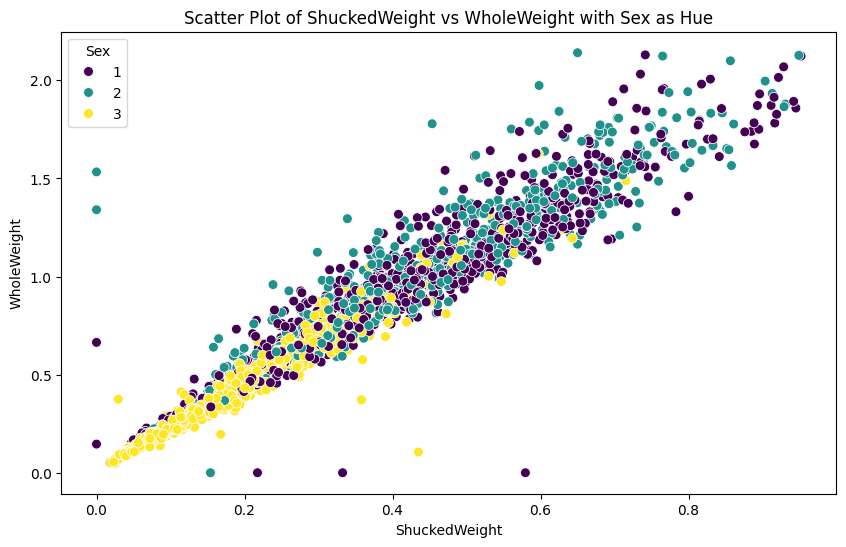

In [359]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='ShuckedWeight(g)', y='WholeWeight(g)', hue='Sex', palette='viridis', s=50)
plt.xlabel('ShuckedWeight')
plt.ylabel('WholeWeight')
plt.title('Scatter Plot of ShuckedWeight vs WholeWeight with Sex as Hue')
plt.legend(title='Sex')
plt.show()

Correlation between columns

                       Sex  Length(mm)  WholeWeight(g)  ShuckedWeight(g)
Sex               1.000000   -0.438412       -0.452818         -0.435321
Length(mm)       -0.438412    1.000000        0.935812          0.910459
WholeWeight(g)   -0.452818    0.935812        1.000000          0.959152
ShuckedWeight(g) -0.435321    0.910459        0.959152          1.000000


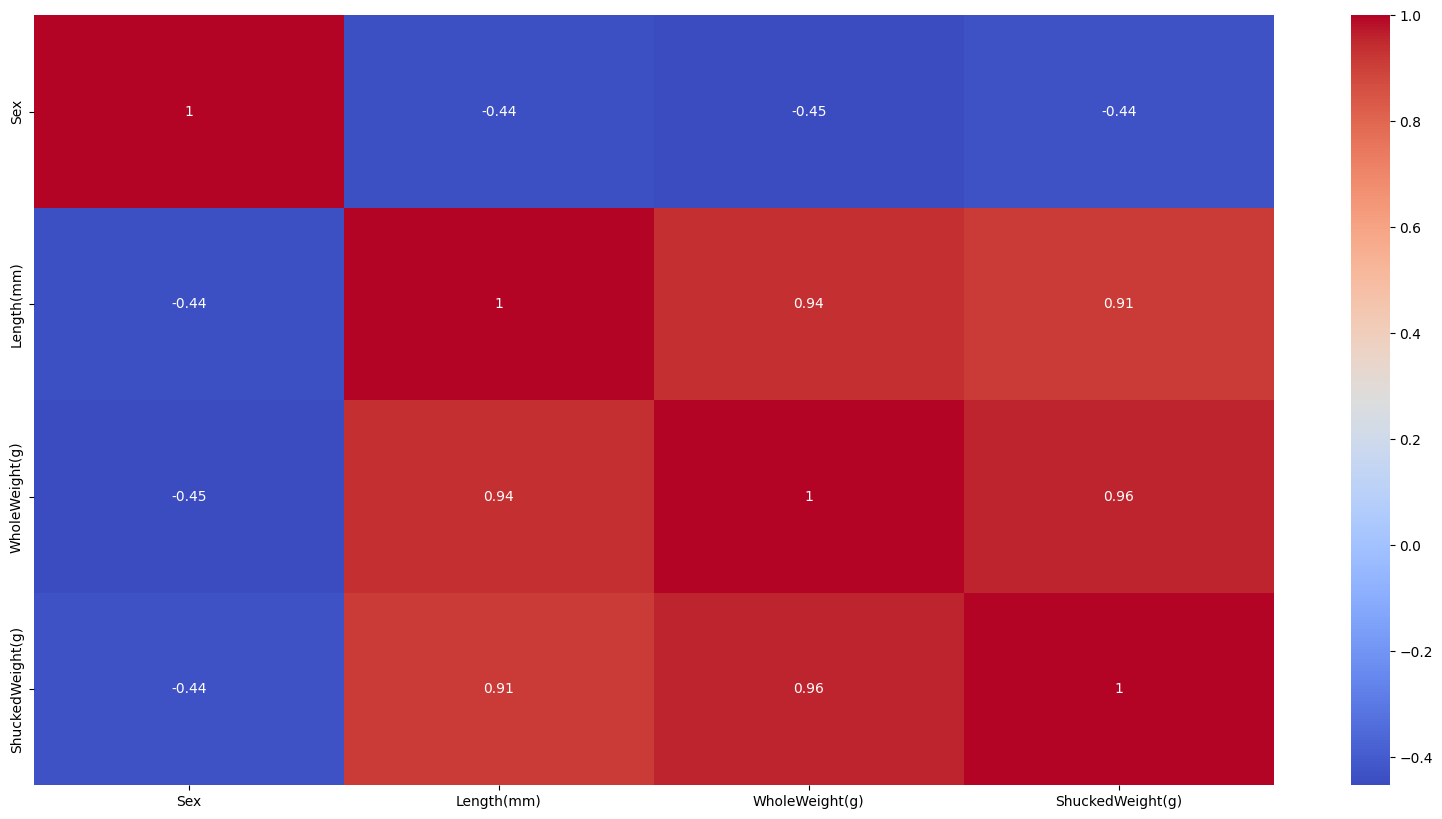

In [360]:
print(clean_df.corr())
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Linear regression

In [362]:
X = clean_df[['WholeWeight(g)']]
y = clean_df['Length(mm)']

# Dividing the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the trained model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R^2 Score: {r2:.5f}")


Mean Squared Error: 0.00165
R^2 Score: 0.87044


Scatter plot for linear regression and regression line

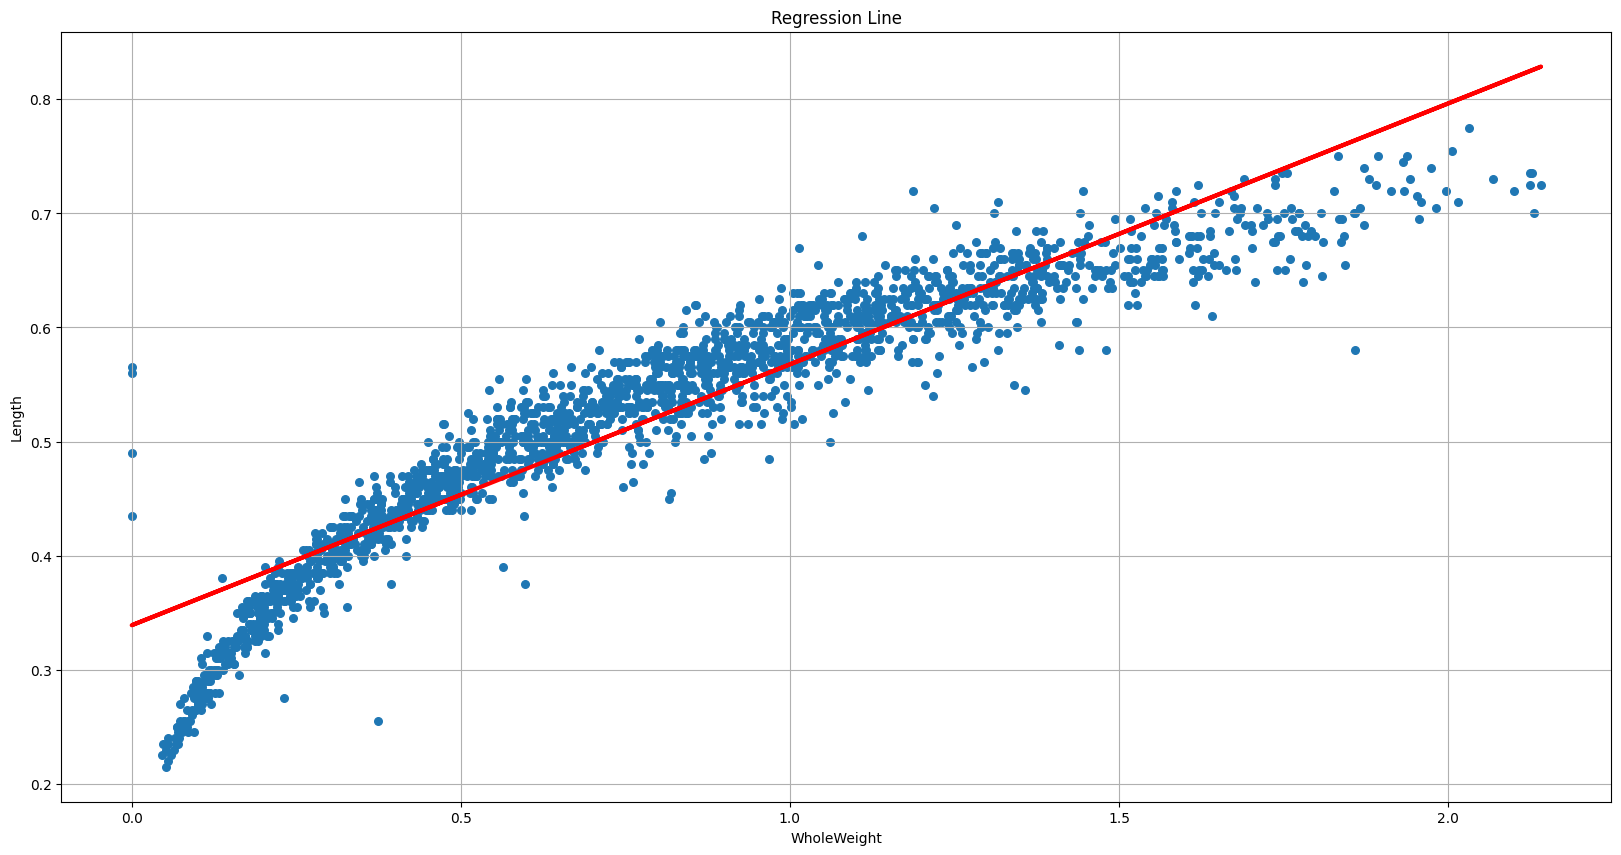

In [367]:
X = clean_df['WholeWeight(g)'].values.reshape(-1, 1)
y = clean_df[['Length(mm)']].values

def estimate_coef(x, y):
    n = np.size(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x
    return (b_0, b_1)

def regression_line_plot(x, y, b):
    plt.scatter(x, y, marker="o", s=30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color="red", linewidth=3)
    plt.xlabel('WholeWeight')
    plt.ylabel('Length')
    plt.title('Regression Line')
    plt.grid(True)
    plt.show()

b = estimate_coef(X, y)
regression_line_plot(X, y, b)


Hierarchical Clustering

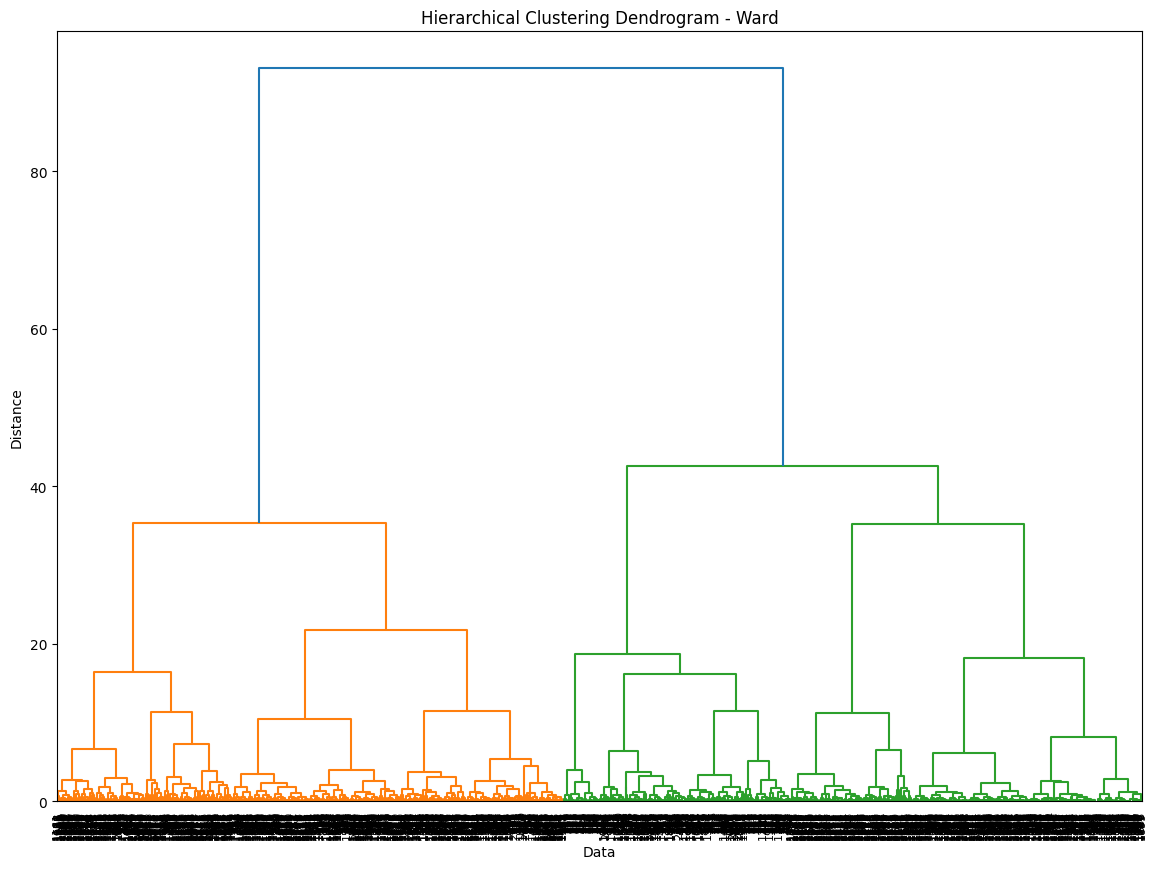

Clusters: [1 2]


In [370]:
#Preprocessing
scaler = StandardScaler()
clean_df_scaled = scaler.fit_transform(clean_df)

#Perform Hierarchical Clustering Ward method
Z = linkage (clean_df_scaled, method='ward', metric='euclidean')

#Plot the Dendrogram
plt.figure(figsize=(14, 10))
plt.title('Hierarchical Clustering Dendrogram - Ward')
plt.xlabel('Data')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

fl = fcluster(Z, 2, criterion='maxclust')
print(f"Clusters: {np.unique(fl)}")

Using AgglomerativeClustering to plot Scatter plots

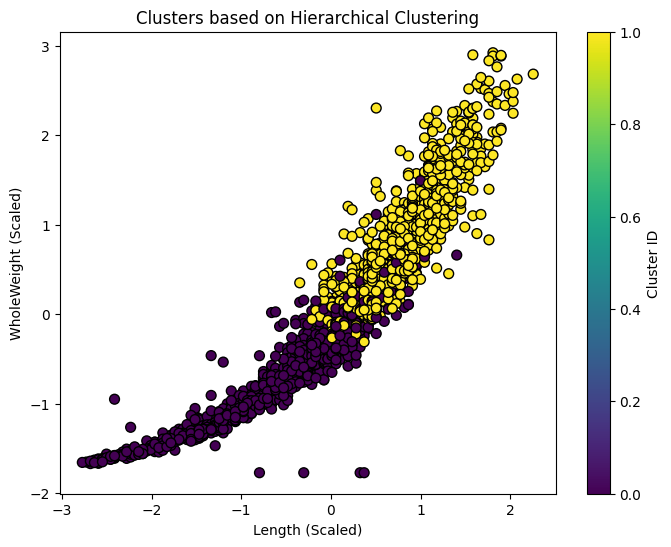

In [374]:
Z = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = Z.fit_predict(clean_df_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(clean_df_scaled[:, 1], clean_df_scaled[:, 2], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters based on Hierarchical Clustering')
plt.xlabel('Length (Scaled)')
plt.ylabel('WholeWeight (Scaled)')
plt.colorbar(label='Cluster ID')
plt.show()

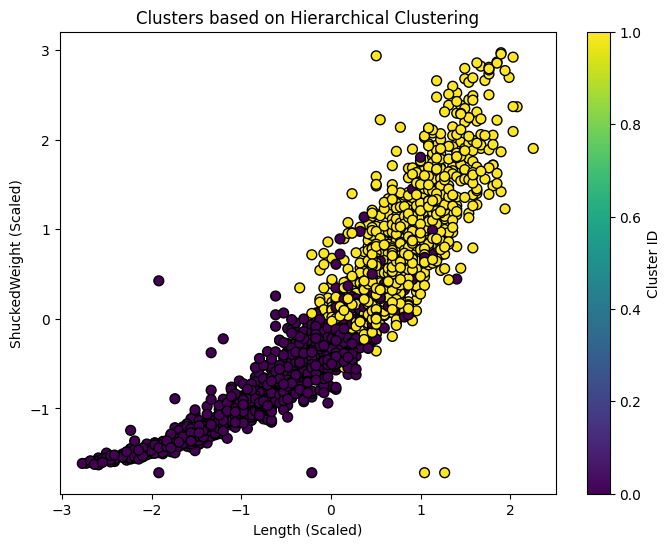

In [375]:
plt.figure(figsize=(8, 6))
plt.scatter(clean_df_scaled[:, 1], clean_df_scaled[:, 3], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters based on Hierarchical Clustering')
plt.xlabel('Length (Scaled)')
plt.ylabel('ShuckedWeight (Scaled)')
plt.colorbar(label='Cluster ID')
plt.show()

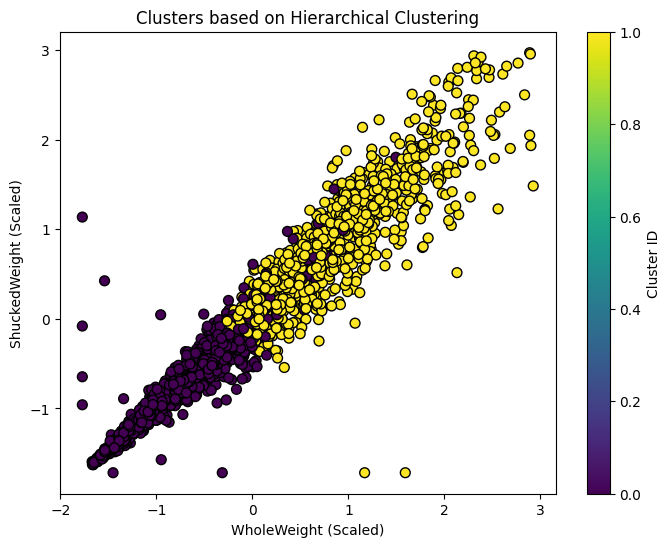

In [376]:
plt.figure(figsize=(8, 6))
plt.scatter(clean_df_scaled[:, 2], clean_df_scaled[:, 3], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters based on Hierarchical Clustering')
plt.xlabel('WholeWeight (Scaled)')
plt.ylabel('ShuckedWeight (Scaled)')
plt.colorbar(label='Cluster ID')
plt.show()

K-Means Clustering for Length and WholeWeight

For n_clusters=2, the silhouette score is 0.5771952688554877
For n_clusters=3, the silhouette score is 0.5490441053476113
For n_clusters=4, the silhouette score is 0.5363416860079231
For n_clusters=5, the silhouette score is 0.5358992300590578
For n_clusters=6, the silhouette score is 0.5183785842093307
For n_clusters=7, the silhouette score is 0.5112563065944056
For n_clusters=8, the silhouette score is 0.5113036599054025
For n_clusters=9, the silhouette score is 0.4889392182085913
For n_clusters=10, the silhouette score is 0.48403629156103606


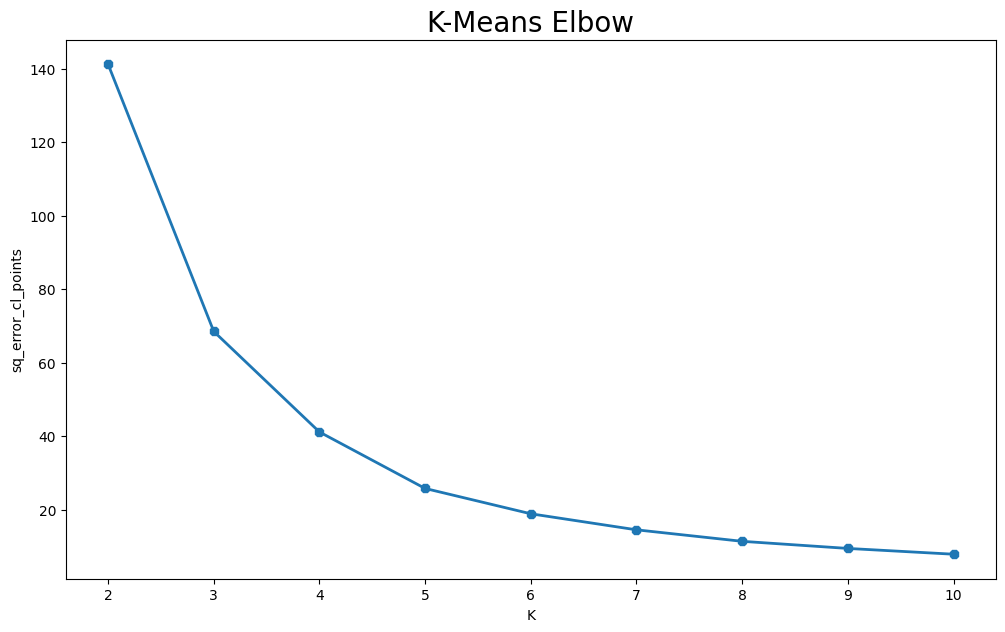

In [441]:
X1 = clean_df[['Length(mm)', 'WholeWeight(g)']].values
sq_error_cl_point=[]
silhouette_scores = []
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    sq_error_cl_point.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

# Plotting the elbow method graph
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), sq_error_cl_point, linewidth=2, marker='8')
plt.title('K-Means Elbow', fontsize=20)
plt.xlabel('K')
plt.ylabel('sq_error_cl_points')
plt.show()

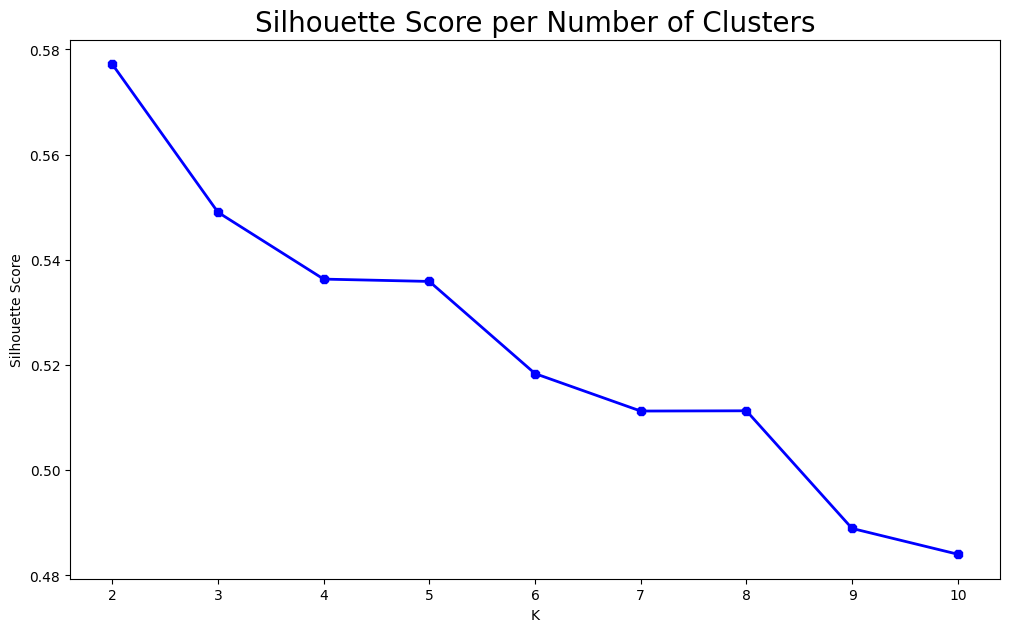

In [442]:
# Plotting silhouette scores
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), silhouette_scores, linewidth=2, marker='8', color='blue')
plt.title('Silhouette Score per Number of Clusters', fontsize=20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Predict the model

In [443]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(X1)
print(labels[:100])

[0 2 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 2 2 2 2 0 0 1 0 1 0 1 0 1 3 1 3 3 2 1 0
 0 2 2 0 2 2 0 2 2 0 0 2 0 2 2 0 2 0 2 0 2 0 0 2 0 2 0 1 0 2 0 2 1 1 1 1 1
 0 0 1 0 3 1 1 1 1 1 0 0 1 0 0 1 1 3 3 0 0 0 0 2 0 0]


Centroid points and scatter plot for k==4

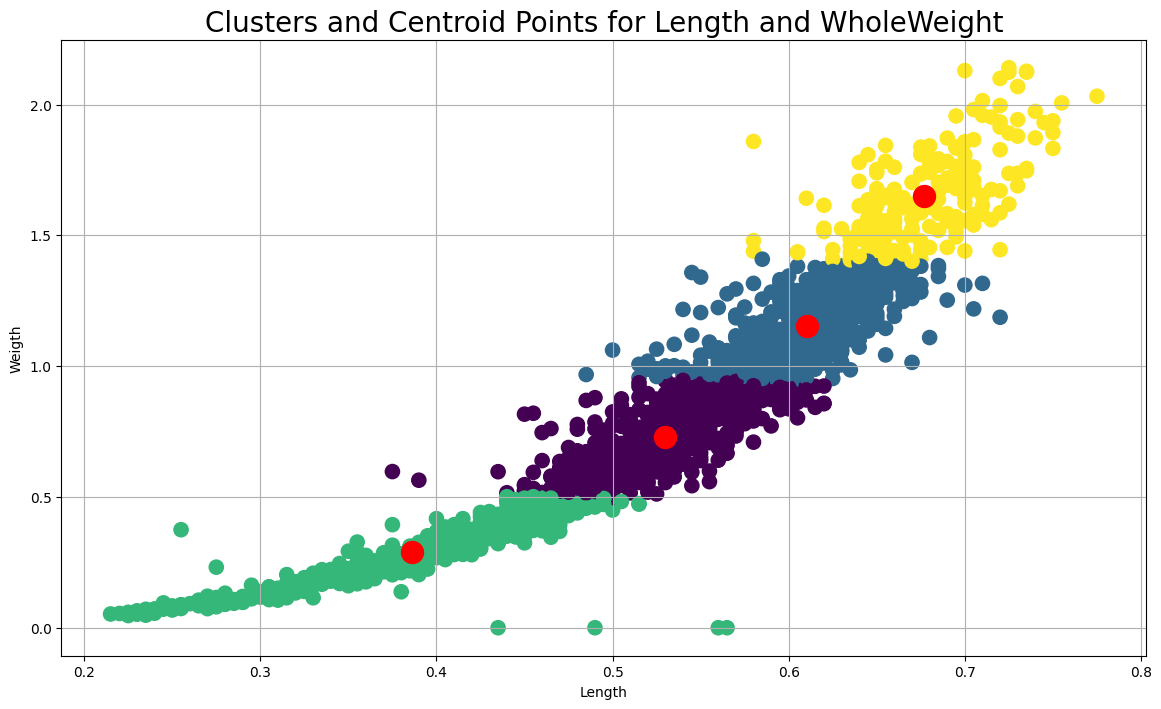

In [444]:
plt.figure(figsize=(14, 8))
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='red', s=250)
plt.title('Clusters and Centroid Points for Length and WholeWeight', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weigth')
plt.grid(True)
plt.show()

K-Means Clustering for Length and ShuckedWeight

For n_clusters=2, the silhouette score is 0.5572819639406635
For n_clusters=3, the silhouette score is 0.5144132487620996
For n_clusters=4, the silhouette score is 0.49429410739868496
For n_clusters=5, the silhouette score is 0.4799900071232201
For n_clusters=6, the silhouette score is 0.4576059732284677
For n_clusters=7, the silhouette score is 0.4488641915274212
For n_clusters=8, the silhouette score is 0.43703838924321475
For n_clusters=9, the silhouette score is 0.43243104977203456
For n_clusters=10, the silhouette score is 0.4081371766896972


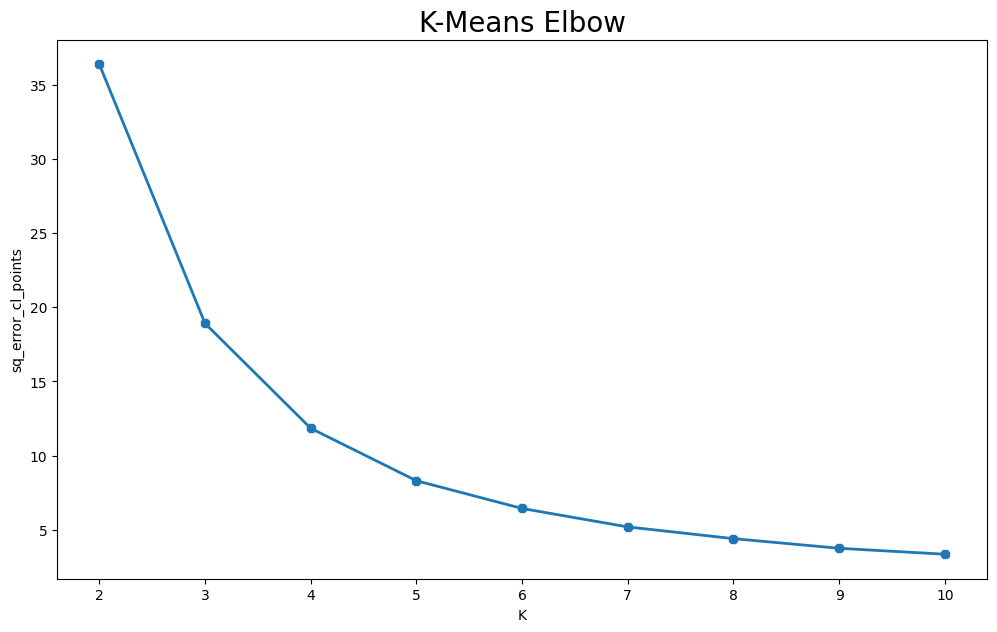

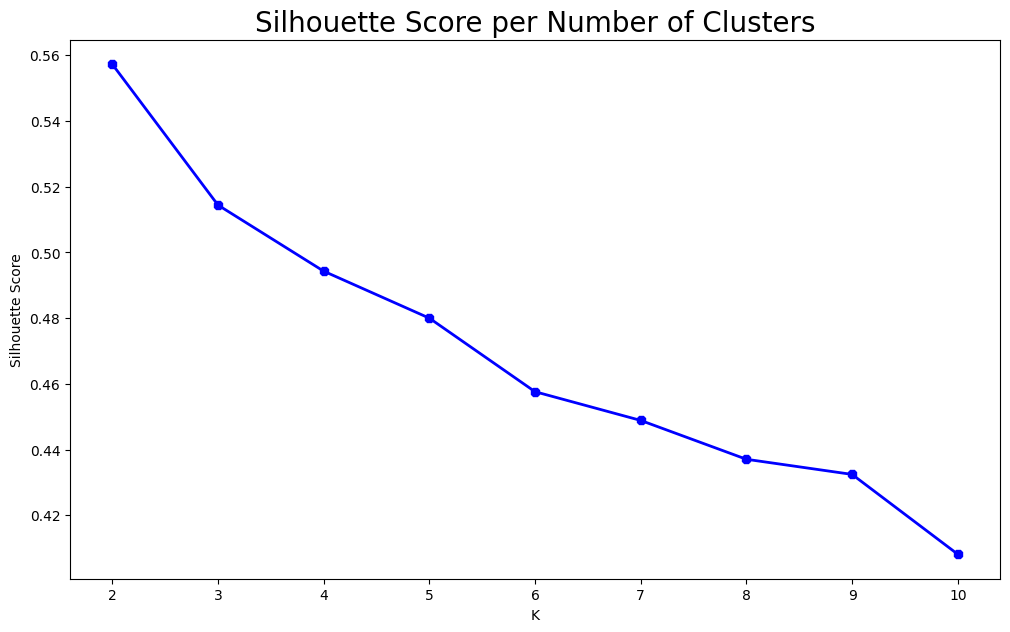

In [437]:
X2 = clean_df[['Length(mm)', 'ShuckedWeight(g)']].values
sq_error_cl_point=[]
silhouette_scores = []
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    sq_error_cl_point.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X2, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

# Plotting the elbow method graph
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), sq_error_cl_point, linewidth=2, marker='8')
plt.title('K-Means Elbow', fontsize=20)
plt.xlabel('K')
plt.ylabel('sq_error_cl_points')
plt.show()



# Plotting silhouette scores
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), silhouette_scores, linewidth=2, marker='8', color='blue')
plt.title('Silhouette Score per Number of Clusters', fontsize=20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


Predict the model

In [438]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(X2)
print(labels[:100])

[1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 3 3 1 3 1 3 0 1 0 0 0 0 0 0 0 2 2 2 2 1 0 1
 0 3 1 0 3 3 1 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1 1 3 1 1 0 0 1 3 1 3 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 2 2 1 1 1 1 3 1 1]


Centroid points and scatter plot for k==4

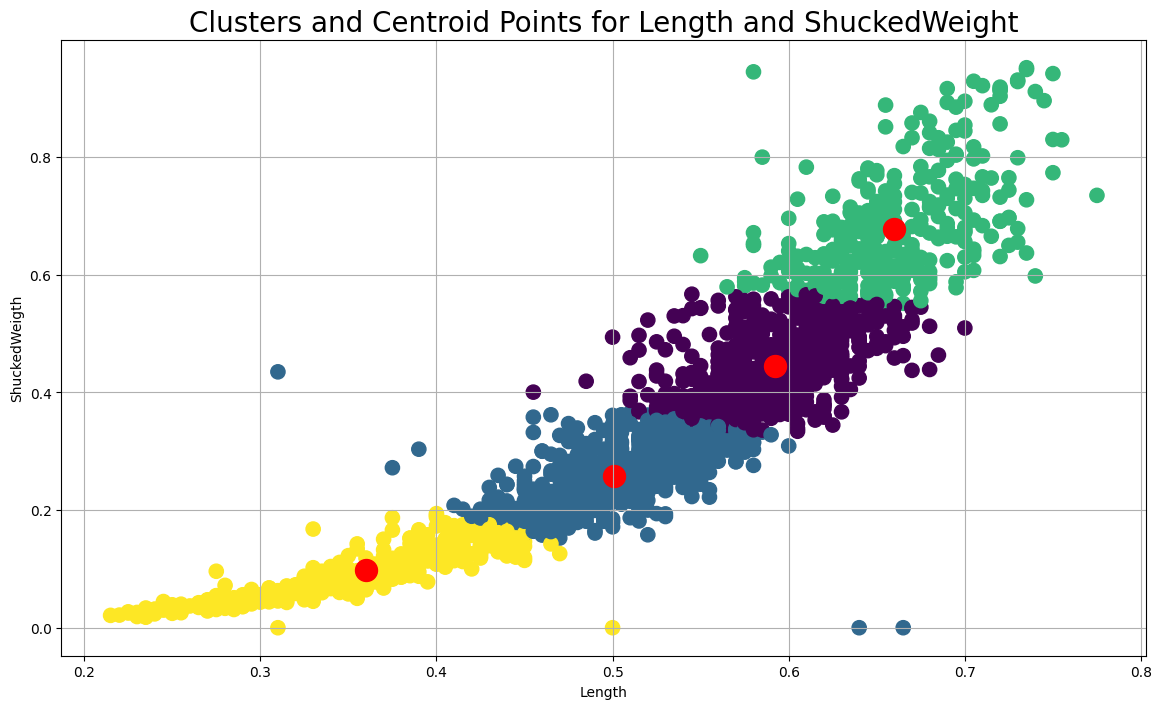

In [439]:
plt.figure(figsize=(14, 8))
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='red', s=250)
plt.title('Clusters and Centroid Points for Length and ShuckedWeight', fontsize=20)
plt.xlabel('Length')
plt.ylabel('ShuckedWeigth')
plt.grid(True)
plt.show()